Dataset Exploration

In [33]:
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import seaborn as sns


Auser Dataset

In [2]:
Auser = pd.read_csv('Aquifer_Auser.csv')

In [3]:
Auser["Date"] = pd.to_datetime(Auser["Date"], format='%d/%m/%y', exact=False)

In [4]:
Auser['Date'] #Checking if the dataset is order by date

0      2019-03-05
1      2019-03-06
2      2019-03-07
3      2019-03-08
4      2019-03-09
          ...    
8149   2020-06-26
8150   2020-06-27
8151   2020-06-28
8152   2020-06-29
8153   2020-06-30
Name: Date, Length: 8154, dtype: datetime64[ns]

In [5]:
NAPercentage = [(c, Auser[c].isna().mean()*100) for c in Auser.columns] 
pd.DataFrame(NAPercentage, columns=['Column Name', 'NA percentage'])

Column Name  NA percentage
0                                      Date       0.000000
1                        Rainfall_Gallicano      35.062546
2                       Rainfall_Pontetetto      35.062546
3                      Rainfall_Monte_Serra      35.136130
4                         Rainfall_Orentano      35.062546
5                  Rainfall_Borgo_a_Mozzano      35.062546
6                        Rainfall_Piaggione      39.538877
7                        Rainfall_Calavorno      35.062546
8                     Rainfall_Croce_Arcana      35.062546
9   Rainfall_Tereglio_Coreglia_Antelminelli      35.062546
10            Rainfall_Fabbriche_di_Vallico      35.062546
11                 Depth_to_Groundwater_LT2      41.108658
12                 Depth_to_Groundwater_SAL      44.260486
13                 Depth_to_Groundwater_PAG      53.311258
14                 Depth_to_Groundwater_CoS      47.081187
15                Depth_to_Groundwater_DIEC      59.896983
16                     Temperature_Orentano       0.000000
17                  Temperature_Monte_Serra       0.000000
18              Temperature_Ponte_a_Moriano       0.000000
19          Temperature_Lucca_Orto_Botanico       0.000000
20                               Volume_POL      30.586215
21                               Volume_CC1      30.586215
22                               Volume_CC2      30.586215
23                               Volume_CSA      30.586215
24                              Volume_CSAL      30.586215
25               Hydrometry_Monte_S_Quirico      11.196959
26                     Hydrometry_Piaggione      24.957076

As temperatures are the only variable with no NAs. Let's see if we can find any pattern in these variables

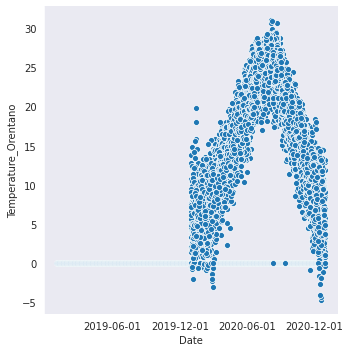

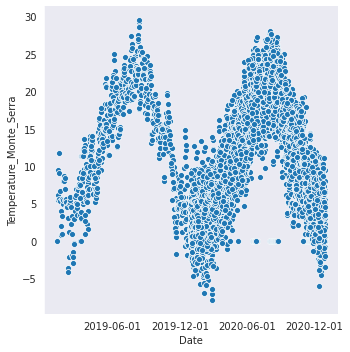

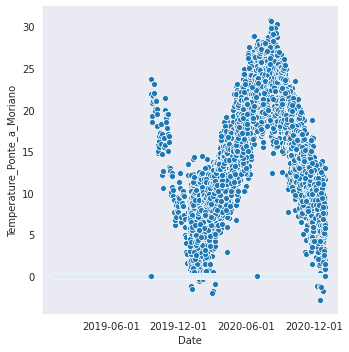

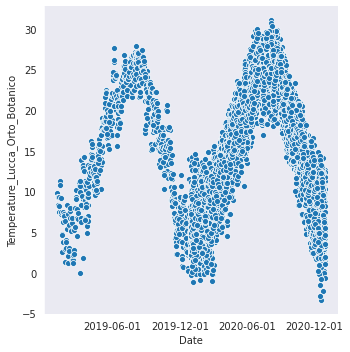

In [15]:
ticks=pd.to_datetime([str(m).zfill(2)+"-"+str(y).zfill(2) for y in [19, 20] for m in [12,6]], format = "%m-%y", exact=False)
sns.set_style("dark")
sns.relplot(data=Auser, x='Date', y='Temperature_Orentano').set(xticks = ticks)
sns.relplot(data=Auser, x='Date', y='Temperature_Monte_Serra').set(xticks = ticks)
sns.relplot(data=Auser, x='Date', y='Temperature_Ponte_a_Moriano').set(xticks = ticks)
sns.relplot(data=Auser, x='Date', y='Temperature_Lucca_Orto_Botanico').set(xticks = ticks)

The temperatures seems to be highly related to each other, and also there are temperatures of 0 degrees that seems to be NA in the data

In [30]:
Auser.replace({"Temperature_Orentano": 0}, np.NaN, inplace=True)
Auser.replace({"Temperature_Monte_Serra": 0}, np.NaN, inplace=True)
Auser.replace({"Temperature_Ponte_a_Moriano": 0}, np.NaN, inplace=True)

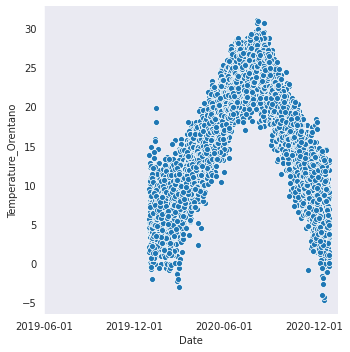

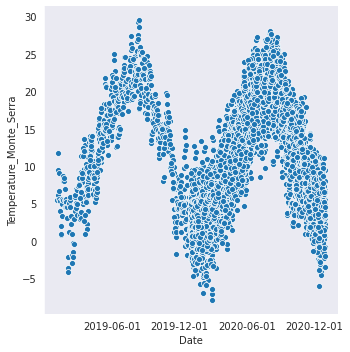

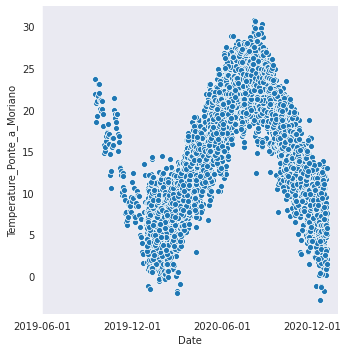

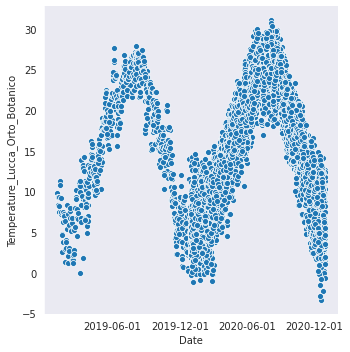

In [31]:
sns.set_style("dark")
sns.relplot(data=Auser, x='Date', y='Temperature_Orentano').set(xticks = ticks)
sns.relplot(data=Auser, x='Date', y='Temperature_Monte_Serra').set(xticks = ticks)
sns.relplot(data=Auser, x='Date', y='Temperature_Ponte_a_Moriano').set(xticks = ticks)
sns.relplot(data=Auser, x='Date', y='Temperature_Lucca_Orto_Botanico').set(xticks = ticks)